In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import sklearn.linear_model as skl_lm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.discrete.discrete_model as smd

In [225]:
dataset1 = pd.read_csv("/Users/nedianurani/Downloads/Assignment/Churn-Billing.csv",
                          sep=',', delimiter = None,
                          header='infer', names=None,
                          index_col = None, usecols = None,
                          encoding = "ISO-8859-1")

dataset2 = pd.read_csv("/Users/nedianurani/Downloads/Assignment/Churn-CustomerMasterData.csv",
                          sep=',', delimiter = None,
                          header='infer', names=None,
                          index_col = None, usecols = None,
                          encoding = "ISO-8859-1")

In [226]:
dataset1.columns

Index(['customerID', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [227]:
dataset2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')

In [228]:
dataset1.head()

,customerID,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [229]:
dataset2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,3999-WRNGR,Female,0,Yes,Yes
1,1965-DDBWU,Male,0,No,No
2,6734-CKRSM,Female,0,No,No
3,1761-AEZZR,Male,0,No,No
4,4138-NAXED,Male,0,No,No


In [230]:
dataset1.shape

(7043, 17)

In [231]:
dataset2.shape

(7043, 5)

In [232]:
data_merge = pd.merge(dataset1, dataset2, on='customerID')

In [233]:
data_merge.shape

(7043, 21)

In [234]:
data_merge.head()

,customerID,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,No phone service,DSL,No,Yes,No,No,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,No,DSL,Yes,No,Yes,No,No,...,One year,No,Mailed check,56.95,1889.50,No,Male,0,No,No
2,3668-QPYBK,2,Yes,No,DSL,Yes,Yes,No,No,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,No,Fiber optic,No,No,No,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [235]:
data_merge.describe(include='all')

,customerID,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
count,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043.000000,7032.000000,7043,7043,7043.000000,7043,7043
unique,7043,NaN,2,3,3,3,3,3,3,3,...,3,2,4,NaN,NaN,2,2,NaN,2,2
top,0248-PGHBZ,NaN,Yes,No,Fiber optic,No,No,No,No,No,...,Month-to-month,Yes,Electronic check,NaN,NaN,No,Male,NaN,No,No
freq,1,NaN,6361,3390,3096,3498,3088,3095,3473,2810,...,3875,4171,2365,NaN,NaN,5174,3555,NaN,3641,4933
mean,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,64.761692,2283.300441,NaN,NaN,0.162147,NaN,NaN
std,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.090047,2266.771362,NaN,NaN,0.368612,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.250000,18.800000,NaN,NaN,0.000000,NaN,NaN
25%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,35.500000,401.450000,NaN,NaN,0.000000,NaN,NaN
50%,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,70.350000,1397.475000,NaN,NaN,0.000000,NaN,NaN
75%,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,89.850000,3794.737500,NaN,NaN,0.000000,NaN,NaN


In [236]:
 # remove samples with all missing values
data_merge = data_merge.dropna(how="all") 
data_merge.shape

(7043, 21)

In [237]:
data_merge = data_merge[~data_merge.duplicated()] # remove duplicates
data_merge.shape

(7043, 21)

In [238]:
total_charges_filter = data_merge.TotalCharges == " "
data_merge = data_merge[~total_charges_filter]
data_merge.shape

(7043, 21)

In [239]:
qualitative = ['PhoneService', 'MultipleLines','InternsetService','OnlineSecurity','OnlineBackup','DeviceProtection',
               'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'gender','SeniorCitizen',
               'Partner', 'Dependents']
quantitative = ['tenure', 'MonthlyCharges', 'TotalCharges']
dependent = 'Churn'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2566f400>,
      dtype=object)

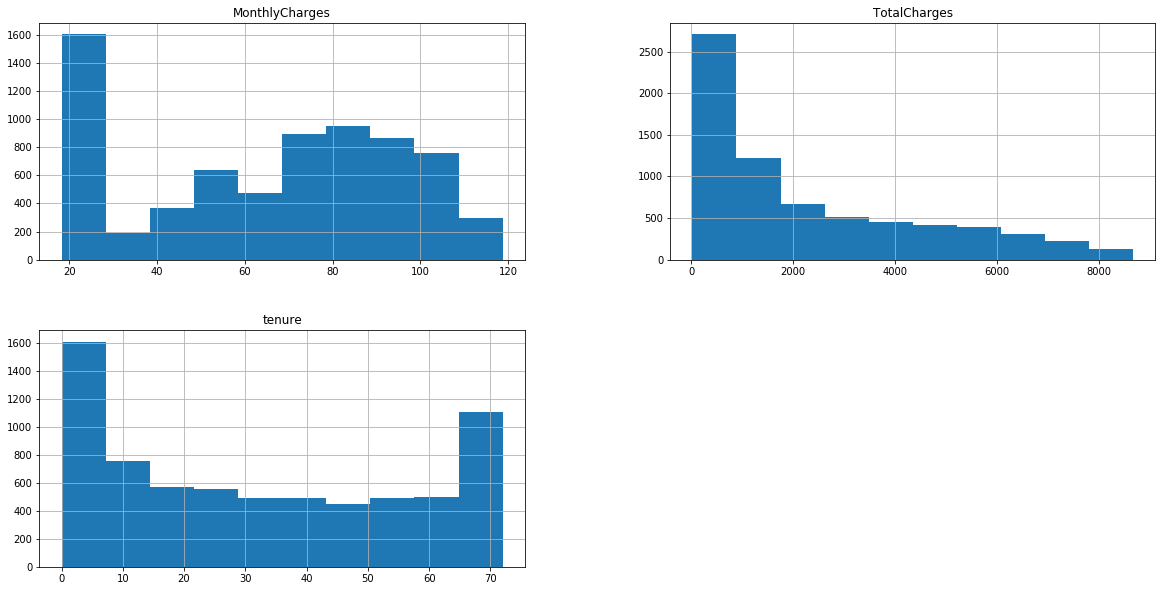

In [240]:
data_merge[quantitative].hist(bins=10, figsize=(20, 10))

/Users/nedianurani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'churned')

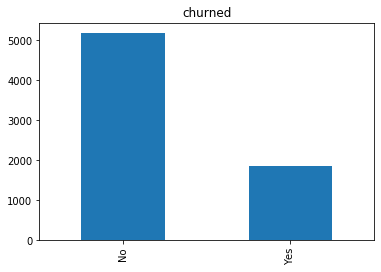

In [241]:
data_merge['Churn'].value_counts().plot('bar').set_title('churned')

/Users/nedianurani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Phone')

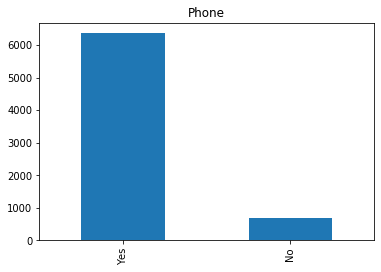

In [242]:
data_merge['PhoneService'].value_counts().plot('bar').set_title('Phone')

/Users/nedianurani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'churned')

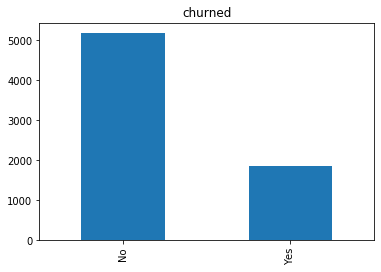

In [243]:
data_merge[dependent].value_counts().plot('bar').set_title('churned')

/Users/nedianurani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Internet')

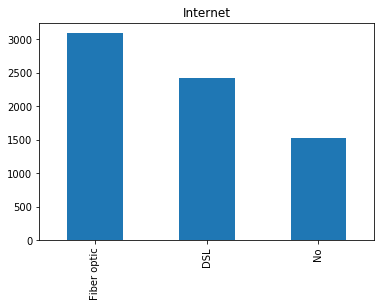

In [244]:
data_merge['InternetService'].value_counts().plot('bar').set_title('Internet')

/Users/nedianurani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Contract')

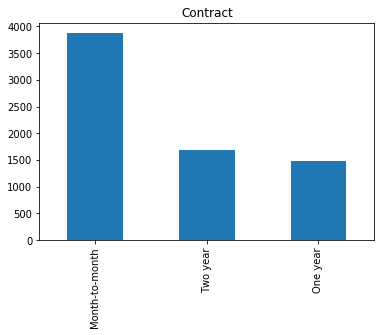

In [245]:
data_merge['Contract'].value_counts().plot('bar').set_title('Contract')

/Users/nedianurani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Payment')

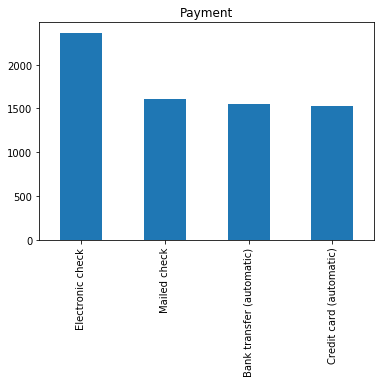

In [246]:
data_merge['PaymentMethod'].value_counts().plot('bar').set_title('Payment')

/Users/nedianurani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Dependents')

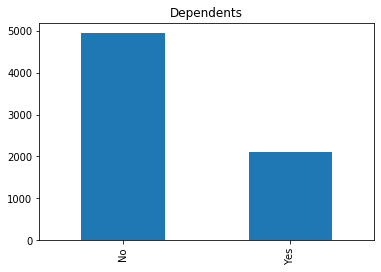

In [247]:
data_merge['Dependents'].value_counts().plot('bar').set_title('Dependents')

/Users/nedianurani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'PaperlessBilling')

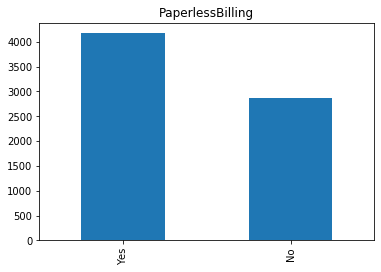

In [248]:
data_merge['PaperlessBilling'].value_counts().plot('bar').set_title('PaperlessBilling')

/Users/nedianurani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'gender')

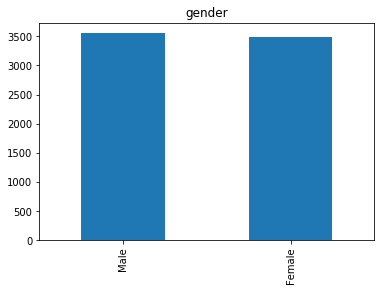

In [249]:
data_merge['gender'].value_counts().plot('bar').set_title('gender')

/Users/nedianurani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Partner')

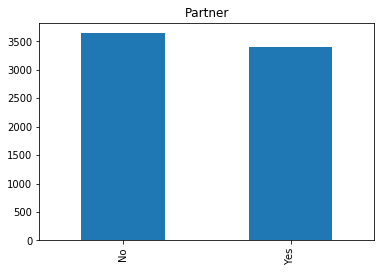

In [250]:
data_merge['Partner'].value_counts().plot('bar').set_title('Partner')

/Users/nedianurani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Dependents')

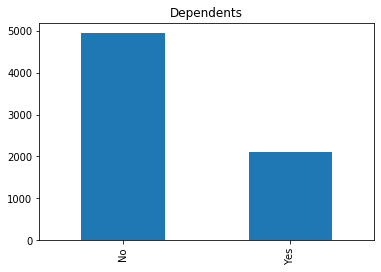

In [251]:
data_merge['Dependents'].value_counts().plot('bar').set_title('Dependents')

/Users/nedianurani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'SeniorCitizen')

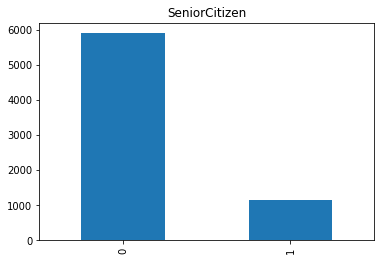

In [252]:
data_merge['SeniorCitizen'].value_counts().plot('bar').set_title('SeniorCitizen')

In [253]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer

In [254]:
data_merge.dtypes

customerID           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
dtype: object

In [255]:
#mention id who have missing data
data_merge[data_merge.isnull().any(axis=1)]

,customerID,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
488,4472-LVYGI,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,...,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,Female,0,Yes,Yes
753,3115-CZMZD,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,...,Two year,No,Mailed check,20.25,NaN,No,Male,0,No,Yes
936,5709-LVOEQ,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,...,Two year,No,Mailed check,80.85,NaN,No,Female,0,Yes,Yes
1082,4367-NUYAO,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,...,Two year,No,Mailed check,25.75,NaN,No,Male,0,Yes,Yes
1340,1371-DWPAZ,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,...,Two year,No,Credit card (automatic),56.05,NaN,No,Female,0,Yes,Yes
3331,7644-OMVMY,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,...,Two year,No,Mailed check,19.85,NaN,No,Male,0,Yes,Yes
3826,3213-VVOLG,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,...,Two year,No,Mailed check,25.35,NaN,No,Male,0,Yes,Yes
4380,2520-SGTTA,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,...,Two year,No,Mailed check,20.00,NaN,No,Female,0,Yes,Yes
5218,2923-ARZLG,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,...,One year,Yes,Mailed check,19.70,NaN,No,Male,0,Yes,Yes
6670,4075-WKNIU,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,...,Two year,No,Mailed check,73.35,NaN,No,Female,0,Yes,Yes


In [256]:
data_merge["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [257]:
data_merge["PhoneService"].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [258]:
data_merge["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [259]:
pd.crosstab(data_merge.InternetService, data_merge.PhoneService)

PhoneService,No,Yes
InternetService,,
DSL,682,1739
Fiber optic,0,3096
No,0,1526


In [260]:
from sklearn.preprocessing import LabelEncoder

lb_churn = LabelEncoder()
data_merge["Churn_dummy"] = lb_churn.fit_transform(data_merge["Churn"])
data_merge[["Churn", "Churn_dummy"]].head(5)

,Churn,Churn_dummy
0,No,0
1,No,0
2,Yes,1
3,No,0
4,Yes,1


In [261]:
lb_ps = LabelEncoder()
data_merge["ps"] = lb_ps.fit_transform(data_merge["PhoneService"])
data_merge[["PhoneService", "ps"]].head(5)

,PhoneService,ps
0,No,0
1,Yes,1
2,Yes,1
3,No,0
4,Yes,1


In [262]:
lb_is = LabelEncoder()
data_merge["is"] = lb_is.fit_transform(data_merge["InternetService"])
data_merge[["InternetService", "is"]].head(5)
data_merge["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [263]:
data_merge["is"].value_counts()

1    3096
0    2421
2    1526
Name: is, dtype: int64

In [264]:
lb_pb = LabelEncoder()
data_merge["pb"] = lb_pb.fit_transform(data_merge["PaperlessBilling"])
data_merge[["PaperlessBilling", "pb"]].head(5)

,PaperlessBilling,pb
0,Yes,1
1,No,0
2,Yes,1
3,No,0
4,Yes,1


In [265]:
lb_pm = LabelEncoder()
data_merge["pm"] = lb_pm.fit_transform(data_merge["PaymentMethod"])
data_merge[["PaymentMethod", "pm"]].head(5)

,PaymentMethod,pm
0,Electronic check,2
1,Mailed check,3
2,Mailed check,3
3,Bank transfer (automatic),0
4,Electronic check,2


In [266]:
lb_gender = LabelEncoder()
data_merge["gender_dummy"] = lb_gender.fit_transform(data_merge["gender"])
data_merge[["gender", "gender_dummy"]].head(5)

,gender,gender_dummy
0,Female,0
1,Male,1
2,Male,1
3,Male,1
4,Female,0


In [267]:
lb_Partner = LabelEncoder()
data_merge["Partner_dummy"] = lb_Partner.fit_transform(data_merge["Partner"])
data_merge[["Partner", "Partner_dummy"]].head(5)

,Partner,Partner_dummy
0,Yes,1
1,No,0
2,No,0
3,No,0
4,No,0


In [268]:
lb_SeniorCitizen = LabelEncoder()
data_merge["SeniorCitizen_dummy"] = lb_SeniorCitizen.fit_transform(data_merge["SeniorCitizen"])
data_merge[["SeniorCitizen", "SeniorCitizen_dummy"]].head(5)

,SeniorCitizen,SeniorCitizen_dummy
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [269]:
lb_Dependents = LabelEncoder()
data_merge["Dependents_dummy"] = lb_Dependents.fit_transform(data_merge["Dependents"])
data_merge[["Dependents", "Dependents_dummy"]].head(5)

,Dependents,Dependents_dummy
0,No,0
1,No,0
2,No,0
3,No,0
4,No,0


In [270]:
data_merge.head()

,customerID,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Dependents,Churn_dummy,ps,is,pb,pm,gender_dummy,Partner_dummy,SeniorCitizen_dummy,Dependents_dummy
0,7590-VHVEG,1,No,No phone service,DSL,No,Yes,No,No,No,...,No,0,0,0,1,2,0,1,0,0
1,5575-GNVDE,34,Yes,No,DSL,Yes,No,Yes,No,No,...,No,0,1,0,0,3,1,0,0,0
2,3668-QPYBK,2,Yes,No,DSL,Yes,Yes,No,No,No,...,No,1,1,0,1,3,1,0,0,0
3,7795-CFOCW,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,...,No,0,0,0,0,0,1,0,0,0
4,9237-HQITU,2,Yes,No,Fiber optic,No,No,No,No,No,...,No,1,1,1,1,2,0,0,0,0


In [271]:
#recode internet service to be yes and no
def internet(series):
    if series == "DSL":
        return "Yes"
    elif series == "Fiber optic":
        return "Yes"
    else:
        return series

data_merge['internet'] = data_merge['InternetService'].apply(internet)


In [272]:
data_merge["internet"].value_counts()

Yes    5517
No     1526
Name: internet, dtype: int64

In [273]:
lb_internet = LabelEncoder()
data_merge["internet_dummy"] = lb_is.fit_transform(data_merge["internet"])
data_merge[["internet", "internet_dummy"]].head(5)
data_merge["internet_dummy"].value_counts()

1    5517
0    1526
Name: internet_dummy, dtype: int64

In [274]:
data_merge["ps"].value_counts()

1    6361
0     682
Name: ps, dtype: int64

In [275]:
pd.crosstab(data_merge.internet_dummy, data_merge.ps)

ps,0,1
internet_dummy,,
0,0,1526
1,682,4835


In [276]:
Contract_dummy = pd.get_dummies(data_merge['Contract'], prefix = 'Contract')
Contract_dummy.head()

,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [277]:
data_merge=pd.concat([data_merge,Contract_dummy], axis=1)

In [278]:
Payment_dummy = pd.get_dummies(data_merge['PaymentMethod'], prefix = 'Payment')
Payment_dummy.head()

,Payment_Bank transfer (automatic),Payment_Credit card (automatic),Payment_Electronic check,Payment_Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [279]:
data_merge=pd.concat([data_merge,Payment_dummy], axis=1)

In [280]:
#for recoding tenure
data_merge["tenure"].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [293]:

# create new variable for user internet, phone, and internet&phone
def ip(data_merge) :
    if (data_merge["ps"] ==1) & (data_merge["internet_dummy"] ==1 ):
        return "ip"
    elif (data_merge["ps"] ==1) & (data_merge["internet_dummy"] ==0 ):
        return "p"
    elif (data_merge["ps"] ==0) & (data_merge["internet_dummy"] ==1) :
        return "i"
   
    
data_merge["ip"] = data_merge.apply(lambda data_merge:ip(data_merge),
                                      axis = 1)

In [282]:
data_merge["ip"].value_counts()

ip    4835
p     1526
i      682
Name: ip, dtype: int64

In [283]:
ip_dummy = pd.get_dummies(data_merge['ip'], prefix = 'ip')
ip_dummy.head()

,ip_i,ip_ip,ip_p
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [284]:
data_merge=pd.concat([data_merge,ip_dummy], axis=1)

In [285]:

def tenure_new(series):
    if series == 0:
        return 1
   
    else:
        return series

data_merge['tenure_new'] = data_merge['tenure'].apply(tenure_new)
    


In [286]:
data_merge["tenure_new"].value_counts()

1     624
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure_new, Length: 72, dtype: int64

In [287]:
data_merge["ip_i"].value_counts()

0    6361
1     682
Name: ip_i, dtype: int64

In [288]:

#transform monthly charger and total chareg using logarithm 
data_merge['log_tcharge'] = np.log(data_merge['TotalCharges'])
data_merge['log_tcharge'].head()

0    3.396185
1    7.544068
2    4.683519
3    7.517928
4    5.021575
Name: log_tcharge, dtype: float64

In [289]:
data_merge['log_mcharge'] = np.log(data_merge['MonthlyCharges'])
data_merge['log_mcharge'].head()

0    3.396185
1    4.042174
2    3.986202
3    3.744787
4    4.258446
Name: log_mcharge, dtype: float64

In [290]:
data_merge.dtypes

customerID                            object
tenure                                 int64
PhoneService                          object
MultipleLines                         object
InternetService                       object
OnlineSecurity                        object
OnlineBackup                          object
DeviceProtection                      object
TechSupport                           object
StreamingTV                           object
StreamingMovies                       object
Contract                              object
PaperlessBilling                      object
PaymentMethod                         object
MonthlyCharges                       float64
TotalCharges                         float64
Churn                                 object
gender                                object
SeniorCitizen                          int64
Partner                               object
Dependents                            object
Churn_dummy                            int64
ps        

In [406]:
X_train = sm.add_constant(data_merge[['gender_dummy', 'Partner_dummy', 'SeniorCitizen_dummy', 'Dependents_dummy','tenure_new',
                                      'log_mcharge', 'Contract_One year', 'Contract_Two year', 'pb', 'Payment_Mailed check', 
                                      'Payment_Credit card (automatic)', 'Payment_Electronic check', 'ip_i', 'ip_p']])
y = data_merge.Churn_dummy
est = smd.Logit(y, X_train).fit() 
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.425665
         Iterations 8


/Users/nedianurani/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-7.594472,0.678148,-11.198847,4.130726e-29,-8.923618,-6.265327
gender_dummy,-0.007725,0.063833,-0.121019,9.036757e-01,-0.132835,0.117385
Partner_dummy,0.009056,0.076366,0.118586,9.056037e-01,-0.140618,0.158730
SeniorCitizen_dummy,0.325494,0.083049,3.919304,8.880492e-05,0.162721,0.488267
Dependents_dummy,-0.217078,0.088140,-2.462871,1.378294e-02,-0.389830,-0.044326
tenure_new,-0.035935,0.002182,-16.467689,6.261752e-61,-0.040211,-0.031658
log_mcharge,1.767100,0.160006,11.043954,2.344823e-28,1.453494,2.080707
Contract_One year,-0.867436,0.102883,-8.431318,3.417943e-17,-1.069083,-0.665790
Contract_Two year,-1.709450,0.169594,-10.079649,6.796864e-24,-2.041848,-1.377051
pb,0.406248,0.072677,5.589804,2.273266e-08,0.263805,0.548692


In [292]:
#make subset sample

In [294]:
data_internet=data_merge[data_merge.ip_i == 1]

In [297]:
data_internet.shape

(682, 46)

In [298]:
data_phone=data_merge[data_merge.ip_p == 1]

In [299]:
data_phone.shape

(1526, 46)

In [300]:
data_phoneinternet=data_merge[data_merge.ip_ip == 1]

In [310]:
data_phoneinternet.dtypes

customerID                            object
tenure                                 int64
PhoneService                          object
MultipleLines                         object
InternetService                       object
OnlineSecurity                        object
OnlineBackup                          object
DeviceProtection                      object
TechSupport                           object
StreamingTV                           object
StreamingMovies                       object
Contract                              object
PaperlessBilling                      object
PaymentMethod                         object
MonthlyCharges                       float64
TotalCharges                         float64
Churn                                 object
gender                                object
SeniorCitizen                          int64
Partner                               object
Dependents                            object
Churn_dummy                            int64
ps        

In [408]:
data = data_merge [['Churn_dummy','tenure_new', 'log_mcharge',  'pb','gender_dummy',
                   'Partner_dummy', 'SeniorCitizen_dummy', 'Dependents_dummy','Contract_One year',
                   'Contract_Two year', 'Payment_Credit card (automatic)',
                   'Payment_Electronic check', 'Payment_Mailed check', 'ip_i', 'ip_p']]

In [374]:
df = pd.DataFrame(data, columns=data.columns)


In [375]:
df['Churn_dummy'] = pd.DataFrame(data.Churn_dummy)
df.head()

,Churn_dummy,tenure_new,log_mcharge,pb,pm,gender_dummy,Partner_dummy,SeniorCitizen_dummy,Dependents_dummy,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Bank transfer (automatic),Payment_Credit card (automatic),Payment_Electronic check,Payment_Mailed check,ip_i,ip_ip,ip_p
0,0,1,3.396185,1,2,0,1,0,0,1,0,0,0,0,1,0,1,0,0
1,0,34,4.042174,0,3,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,1,2,3.986202,1,3,1,0,0,0,1,0,0,0,0,0,1,0,1,0
3,0,45,3.744787,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
4,1,2,4.258446,1,2,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [366]:
corr = df.corr()
print(corr.Churn_dummy)

Churn_dummy                          1.000000
tenure_new                          -0.352296
log_mcharge                          0.210326
pb                                   0.191825
pm                                   0.107062
gender_dummy                        -0.008612
Partner_dummy                       -0.150448
SeniorCitizen_dummy                  0.150889
Dependents_dummy                    -0.164221
Contract_Month-to-month              0.405103
Contract_One year                   -0.177820
Contract_Two year                   -0.302253
Payment_Bank transfer (automatic)   -0.117937
Payment_Credit card (automatic)     -0.134302
Payment_Electronic check             0.301919
Payment_Mailed check                -0.091683
ip_i                                -0.011942
ip_ip                                0.209988
ip_p                                -0.227890
Name: Churn_dummy, dtype: float64


In [367]:
print(data.Churn_dummy)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn_dummy, Length: 7043, dtype: int64


In [414]:
X.head()

,Churn_dummy,tenure_new,log_mcharge,pb,gender_dummy,Partner_dummy,SeniorCitizen_dummy,Dependents_dummy,Contract_One year,Contract_Two year,Payment_Credit card (automatic),Payment_Electronic check,Payment_Mailed check,ip_i,ip_p
0,0,1,3.396185,1,0,1,0,0,0,0,0,1,0,1,0
1,0,34,4.042174,0,1,0,0,0,1,0,0,0,1,0,0
2,1,2,3.986202,1,1,0,0,0,0,0,0,0,1,0,0
3,0,45,3.744787,0,1,0,0,0,1,0,0,0,0,1,0
4,1,2,4.258446,1,0,0,0,0,0,0,0,1,0,0,0


In [415]:
from sklearn.model_selection import train_test_split

X= data[data.columns]
y=data.Churn_dummy

In [416]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [417]:
from sklearn.linear_model import LogisticRegression

In [418]:
logreg = LogisticRegression()

In [419]:
y_pred=logreg.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet

In [392]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

NameError: name 'y_pred' is not defined